In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/lenovo/Downloads/BlinkIT_Grocery_Database.csv")

In [9]:
df.head()
# df.tail()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
print("size of data:",df.shape)

size of data: (8523, 12)


In [6]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [20]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat']


In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'reg':'Regular'
                                                        })

In [21]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat']


In [24]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
no_of_items = df['Sales'].count()
avg_rating = df['Rating'].mean()

print(f"Total sales: ${total_sales:,.1f}")
print(f"Average sales: ${avg_sales:,.1f}")
print(f"No of Items: {no_of_items:,.0f}")
print(f"Average Rating: {avg_rating:,.0f}")

Total sales: $1,201,681.5
Average sales: $141.0
No of Items: 8,523
Average Rating: 4


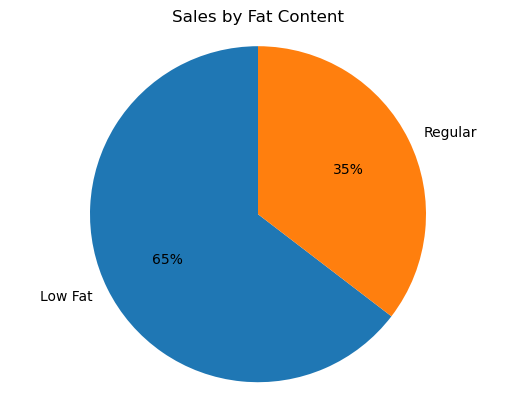

In [26]:
sales_by_fat = df.groupby('Item_Fat_Content')['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,autopct = '%.0f%%',startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

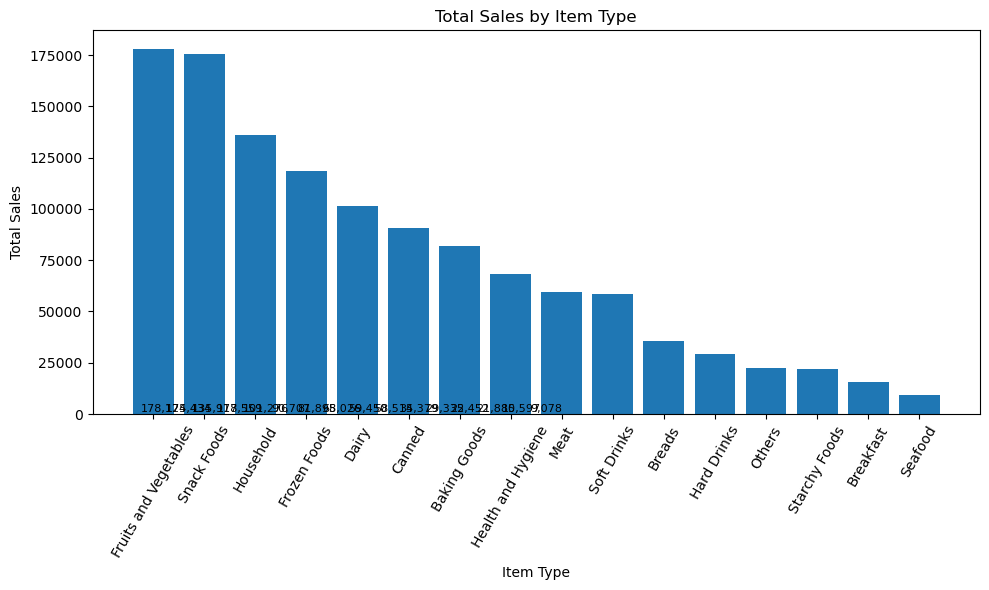

In [14]:
sales_by_type = df.groupby('Item_Type')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=60)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text((bar.get_x() + bar.get_width()) / 2 , bar.get_width(),
             f'{bar.get_height():,.0f}',ha = 'center',va = 'bottom',fontsize = 8)

plt.tight_layout()
plt.show()

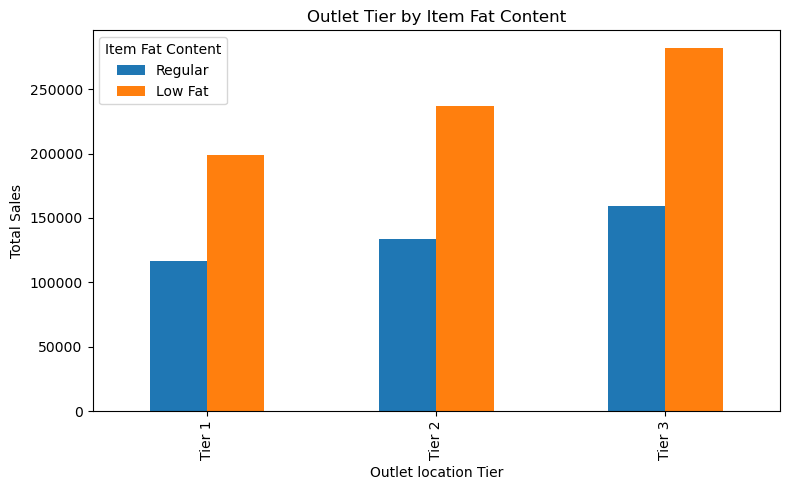

In [17]:
grouped = df.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar',figsize=(8,5),title = 'Outlet Tier by Item Fat Content')

plt.xlabel('Outlet location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

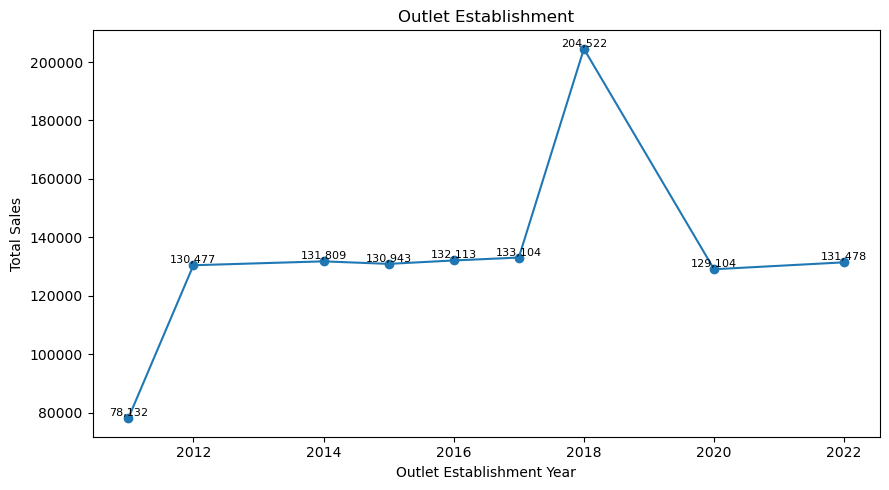

In [29]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Sales'].sum().sort_index() 
                                                        
plt.figure(figsize=(9,5)) 
                                                        
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-') 
plt.xlabel('Outlet Establishment Year') 
plt.ylabel('Total Sales') 
plt.title('Outlet Establishment') 
          
for x, y in zip(sales_by_year.index, sales_by_year.values): 
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8) 
          
plt.tight_layout() 
plt.show()

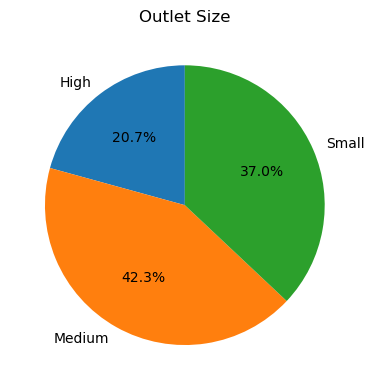

In [33]:
sales_by_size = df.groupby('Outlet_Size')['Sales'].sum() 
plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size') 
plt.tight_layout()
plt.show()

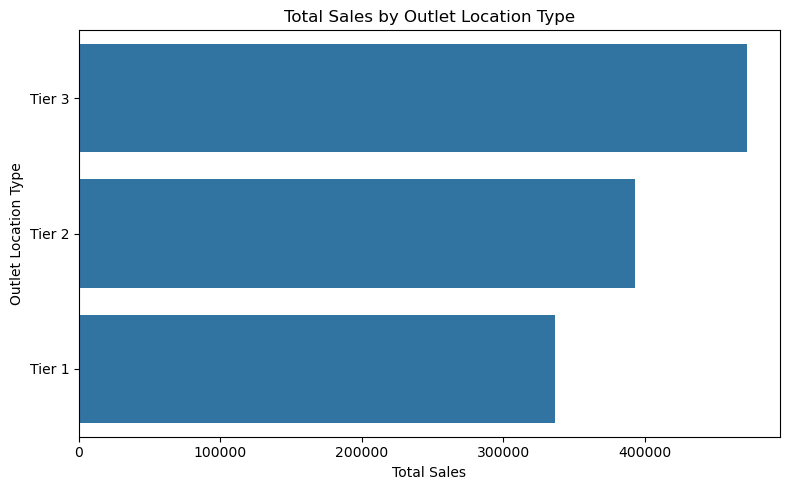

In [37]:
sales_by_location= df.groupby('Outlet_Location_Type') ['Sales'].sum().reset_index() 

sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 5)) # Smaller height, enough width 

ax= sns.barplot(x='Sales', y='Outlet_Location_Type', data=sales_by_location) 

plt.title('Total Sales by Outlet Location Type') 
plt.xlabel('Total Sales') 
plt.ylabel('Outlet Location Type') 
plt.tight_layout() # Ensures Layout fits without scroll 
plt.show()